In [1]:
import os
import itertools as itt
from typing import Optional, Tuple, List

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import astro30m
from cubes_api import Cube, Map

plt.rc("text", usetex=True)

In [2]:
def bounded_power_law(
    n_samples: int,
    bounds: Tuple[float, float],
    alpha: float=1.,
    seed: Optional[int]=None # TODO
):
    xmin, xmax = bounds
    beta = alpha #1 - alpha
    a = xmin**beta
    b = xmax**beta - a

    x = np.random.rand(n_samples)
    return (a + b*x)**(1/beta)

In [3]:
av = astro30m.load_phys_quantity("dust-av", 2020)
g0 = astro30m.load_phys_quantity("dust-g0", 2020)

In [4]:
av_low, av_upp = 3, 25 #50
g0_low, g0_upp = 1e1, 2.4*1e2 #1e5

## Av

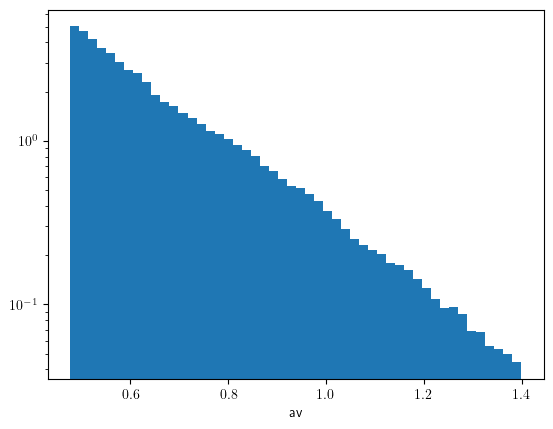

In [5]:
nbins = 50

plt.figure()
y, x, _ = plt.hist(
    av.log(10).data.flatten(),
    bins=nbins, density=True,
    range=[np.log10(av_low), np.log10(av_upp)]
)
plt.yscale("log")
plt.xlabel("av")
plt.show()

In [6]:
c = [(x[i] + x[i+1])/2 for i in range(nbins)]

In [7]:
m, b = np.polyfit(c, np.log10(y), 1)
P = np.poly1d((m, b)) 

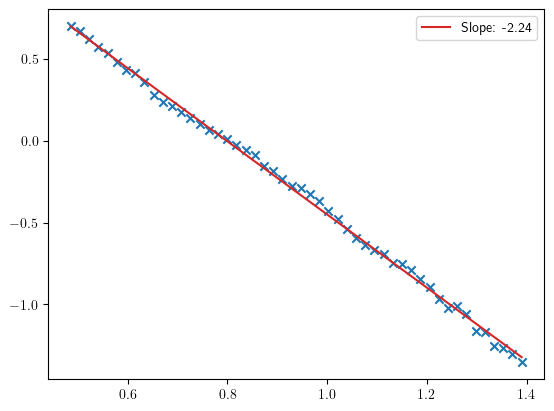

In [8]:
plt.scatter(c, np.log10(y), marker="x")
plt.plot(c, P(c), color="tab:red", label=f"Slope: {m:.2f}")
plt.legend()
plt.show()

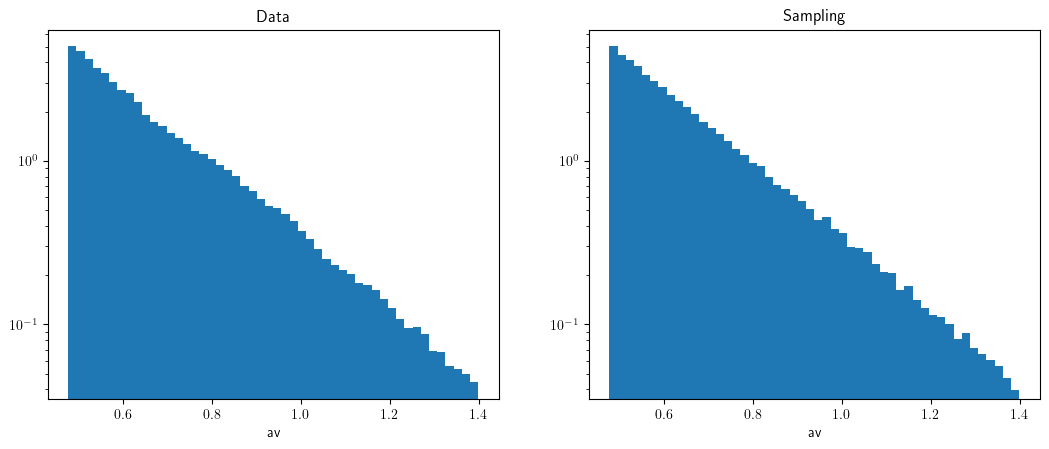

In [9]:
alpha = m
samples = bounded_power_law(
    100_000,
    (av_low, av_upp),
    alpha
)

plt.figure(figsize=(2*6.4, 4.8))

#

plt.subplot(1, 2, 1)

plt.hist(
    av.log(10).data.flatten(),
    bins=nbins, density=True,
    range=[np.log10(av_low), np.log10(av_upp)]
)
plt.yscale("log")
plt.xlabel("av")
plt.title("Data")

ylim = plt.gca().get_ylim()

#

plt.subplot(1, 2, 2)

plt.hist(
    np.log10(samples),
    bins=nbins, density=True,
    range=[np.log10(av_low), np.log10(av_upp)]
)
plt.yscale("log")
plt.xlabel("av")
plt.title("Sampling")

plt.ylim(ylim)

#

plt.show()

## G0

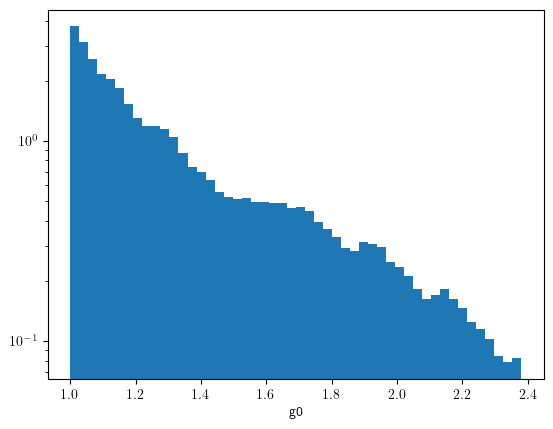

In [10]:
nbins = 50

plt.figure()
y, x, _ = plt.hist(
    g0.log(10).data.flatten(),
    bins=nbins, density=True,
    range=[np.log10(g0_low), np.log10(g0_upp)]
)
plt.yscale("log")
plt.xlabel("g0")
plt.show()

In [11]:
c = [(x[i] + x[i+1])/2 for i in range(nbins)]

In [12]:
m, b = np.polyfit(c, np.log10(y), 1)
P = np.poly1d((m, b)) 

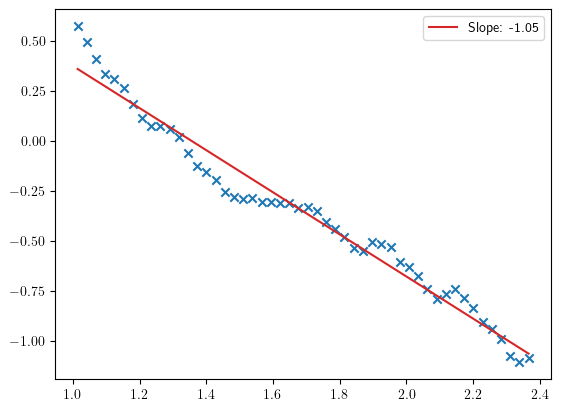

In [13]:
plt.scatter(c, np.log10(y), marker="x")
plt.plot(c, P(c), color="tab:red", label=f"Slope: {m:.2f}")
plt.legend()
plt.show()

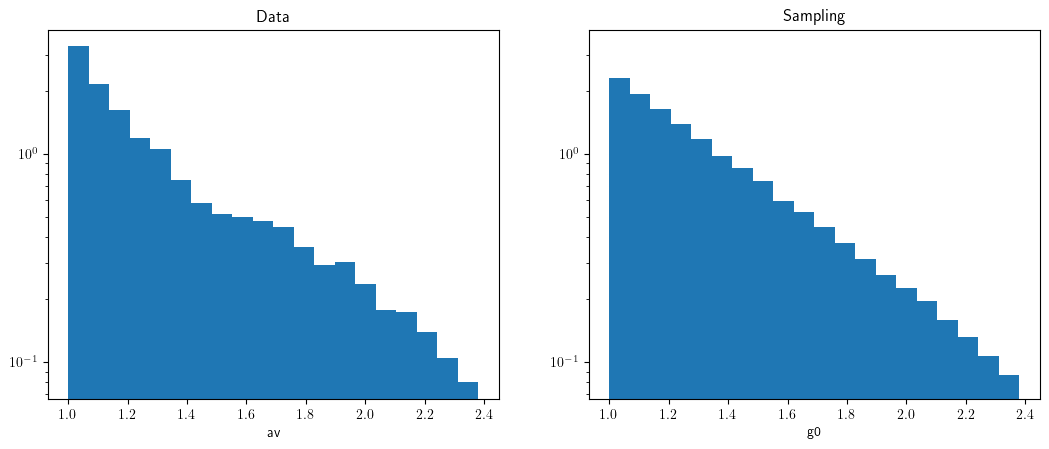

In [15]:
alpha = m
samples = bounded_power_law(
    100_000,
    (g0_low, g0_upp),
    alpha
)

plt.figure(figsize=(2*6.4, 4.8))

#

plt.subplot(1, 2, 1)

plt.hist(
    g0.log(10).data.flatten(),
    bins=nbins, density=True,
    range=[np.log10(g0_low), np.log10(g0_upp)]
)
plt.yscale("log")
plt.xlabel("av")
plt.title("Data")

ylim = plt.gca().get_ylim()

#

plt.subplot(1, 2, 2)

plt.hist(
    np.log10(samples),
    bins=nbins, density=True,
    range=[np.log10(g0_low), np.log10(g0_upp)]
)
plt.yscale("log")
plt.xlabel("g0")
plt.title("Sampling")

plt.ylim(ylim)

#

plt.show()

## Av vs G0

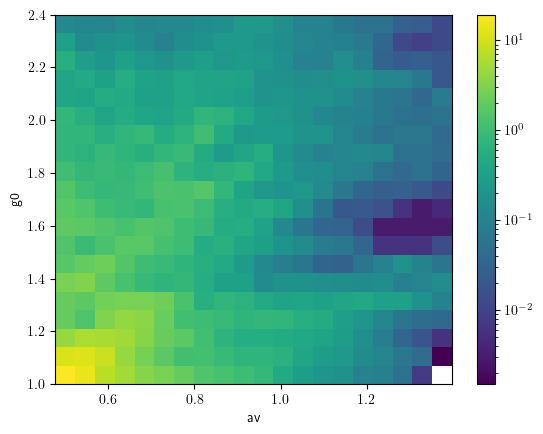

In [14]:
nbins = 20

plt.figure()
plt.hist2d(
    av.log(10).data.flatten(), g0.log(10).data.flatten(),
    bins=(nbins, nbins), norm=LogNorm(), density=True,
    range=[[np.log10(3), np.log10(25)], [1, 2.4]]
)
plt.xlabel("av")
plt.ylabel("g0")
plt.colorbar()
plt.show()